In [3]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('data/CampusRecruitment/Placement_Data_Full_Class.csv', encoding='utf-8')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
df.drop('sl_no', axis=1, inplace=True)

In [6]:
df.profile_report(title='Campus Placement Data - Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.fillna(df.median(), inplace=True)

C:\Users\ishih\AppData\Local\Temp\ipykernel_1156\3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [10]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [15]:
for c, t, n in zip(df.columns, df.dtypes, df.nunique()):
    print(c, t, n)

gender int8 2
ssc_p float64 103
ssc_b int8 2
hsc_p float64 97
hsc_b int8 2
hsc_s object 3
degree_p float64 89
degree_t object 3
workex int8 2
etest_p float64 100
specialisation int8 2
mba_p float64 205
status int8 2
salary float64 45


In [14]:
df['gender'] = df['gender'].astype('category').cat.codes
#df["gender"] = df['gender'].map({"M":0,"F":1})
df['ssc_b'] = df['ssc_b'].astype('category').cat.codes
df['hsc_b'] = df['hsc_b'].astype('category').cat.codes
df['workex'] = df['workex'].astype('category').cat.codes
df['specialisation'] = df['specialisation'].astype('category').cat.codes
df['status'] = df['status'].astype('category').cat.codes

In [16]:
df = pd.get_dummies(data=df, columns=['hsc_s', 'degree_t'])

In [18]:
X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(172, 17)
(43, 17)


In [19]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [20]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.697674,0.697674,1.000000,0.821918,0.651163,0.651163,1.000000,0.788732
1,KNeighborsClassifier,0.976744,1.000000,0.966667,0.983051,1.000000,1.000000,1.000000,1.000000
2,SVC,0.697674,0.697674,1.000000,0.821918,0.651163,0.651163,1.000000,0.788732
3,GaussianNB,0.965116,1.000000,0.950000,0.974359,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeClassifier,0.965116,1.000000,0.950000,0.974359,0.976744,1.000000,0.964286,0.981818
5,RandomForestClassifier,0.924419,0.902256,1.000000,0.948617,0.930233,0.903226,1.000000,0.949153
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
for col, imp in sorted(zip(X_train.columns, model.feature_importances_), key=lambda x:x[1], reverse=True):
    print(col, imp)

salary 0.5465015133381084
ssc_p 0.32732084187655286
hsc_p 0.052276925943316975
mba_p 0.03814794143929393
degree_p 0.03341345033382117
hsc_b 0.0015841109212018389
gender 0.0003309540461391836
etest_p 0.00023362940306203764
specialisation 0.00017433530202471062
hsc_s_Commerce 9.502360693034722e-06
hsc_s_Science 6.388016134005736e-06
ssc_b 3.425170260565969e-07
degree_t_Comm&Mgmt 6.450262577557294e-08
workex 0.0
hsc_s_Arts 0.0
degree_t_Others 0.0
degree_t_Sci&Tech 0.0


In [22]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'salary'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [24]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.901163,0.918699,0.941667,0.930041,0.813953,0.857143,0.857143,0.857143
1,KNeighborsClassifier,0.918605,0.907692,0.983333,0.944000,0.790698,0.851852,0.821429,0.836364
2,SVC,0.947674,0.937008,0.991667,0.963563,0.883721,0.896552,0.928571,0.912281
3,GaussianNB,0.965116,1.000000,0.950000,0.974359,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeClassifier,0.965116,1.000000,0.950000,0.974359,0.976744,1.000000,0.964286,0.981818
5,RandomForestClassifier,0.930233,0.909091,1.000000,0.952381,0.930233,0.931034,0.964286,0.947368
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


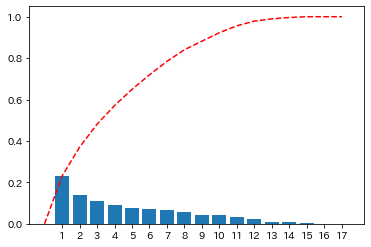

In [25]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [26]:
n = 8
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

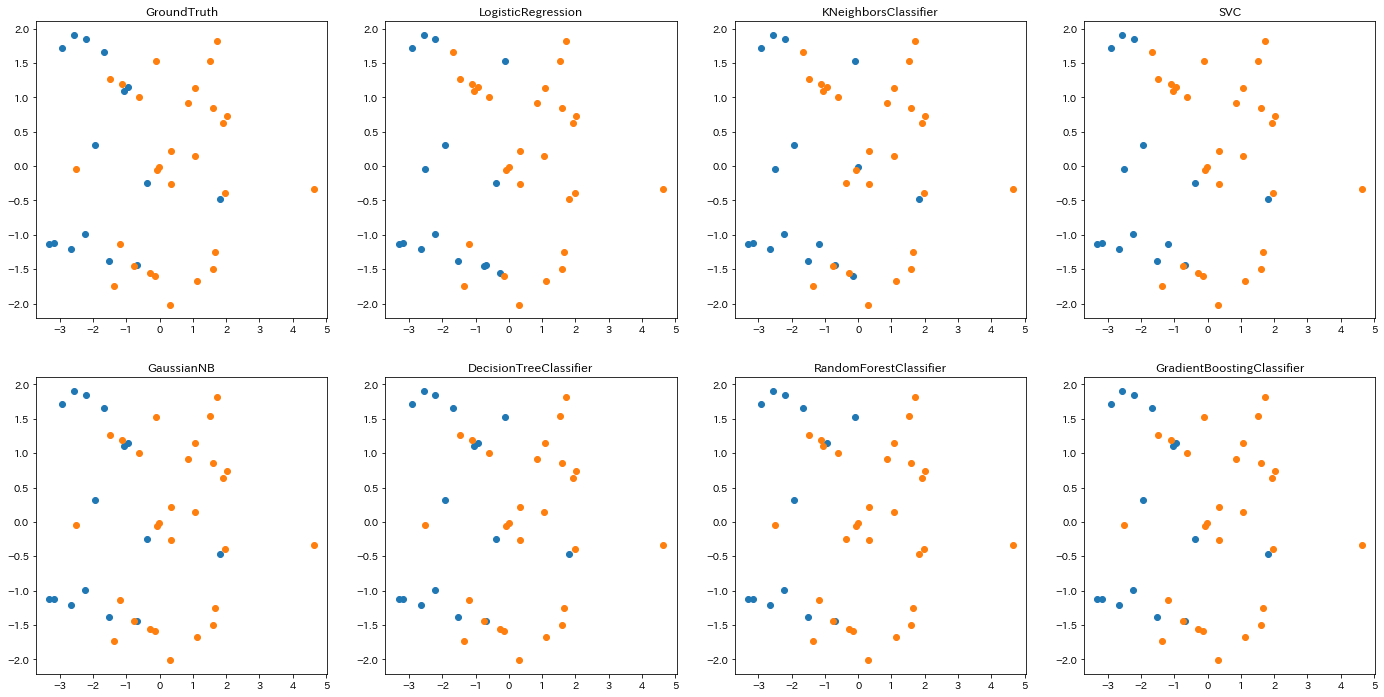

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.901163,0.918699,0.941667,0.930041,0.813953,0.857143,0.857143,0.857143
1,KNeighborsClassifier,0.918605,0.907692,0.983333,0.944000,0.790698,0.851852,0.821429,0.836364
2,SVC,0.947674,0.937008,0.991667,0.963563,0.883721,0.896552,0.928571,0.912281
3,GaussianNB,0.965116,1.000000,0.950000,0.974359,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeClassifier,0.965116,1.000000,0.950000,0.974359,0.976744,1.000000,0.964286,0.981818
5,RandomForestClassifier,0.924419,0.902256,1.000000,0.948617,0.906977,0.900000,0.964286,0.931034
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp